In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

In [0]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)

# restore np.load for future normal usage
np.load = np_load_old

In [5]:
train_data[0] # 1~10000개의 단어에서 I = 1번 / 원핫인코딩, 컬럼I의 인덱스 = 1번,,희소행렬, 리뷰번호가 행 컬럼이 단어 여기서 제일 첫번째 리뷰의 희소행렬의 인덱스 (열 i we she ...)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [0]:
train_labels[0] # 방금 꺼내본 train_data[0]은 긍정적인 리뷰/ 0은 부정 1은 긍정

1

In [6]:
max([max(sequence) for sequence in train_data]) # 가장 큰 단어 인덱스몇인지 10000/ 0부터 시작하므로

19999

In [0]:
# 신경망엔 이러한 숫자 리스트를 주입할수 없음 -> 텐서(벡터)로 바꿔야함
# 1. 각각의 리뷰가 같은 길이가 되어야 함
# 2. 0과 1로 원핫인코딩해야함
# (1, 1, 0, 1, ......만개까지) 같은단어 중복되어도 걍 1 단어가 출현 했나 안했나





In [0]:
def vectorize_sequences(sequences, dimension = 20000): # 한 리뷰당 만차원
  results = np.zeros((len(sequences), dimension)) # 차원을 만들거임/원핫인코딩
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1 # i번째 인덱스에서 
  return results


In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0] # 1이 나온게 등장한 단어의 번호(인덱스), 텐서로 바꿈

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# labels도 어레이로 바뀌어야함
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [0]:
# 신경망에 주입할 데이터가 있음 이제
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape =(10000,)))
model.add(layers.Dense(16, activation = 'relu'))# 중간레이어 인풋쉐이프 필요 x
model.add(layers.Dense(1, activation = 'sigmoid'))# 0과 1의 값을 갖는 활성함수 sigmoid

In [0]:
# 검증데이터 셋만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
len(partial_x_train)

15000

In [0]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) # loss함수는 대충 정해져있다.

In [35]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val)) # val_loss를 확인해서 몇번쨰 반복에서 loss가 올라가는지/acc들을 확인해서 과대적합인지

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5515 - acc: 0.7597 - val_loss: 0.4178 - val_acc: 0.8716
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3335 - acc: 0.9011 - val_loss: 0.3202 - val_acc: 0.8886
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2396 - acc: 0.9240 - val_loss: 0.2880 - val_acc: 0.8898
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1861 - acc: 0.9430 - val_loss: 0.2853 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1491 - acc: 0.9543 - val_loss: 0.2953 - val_acc: 0.8826
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1204 - acc: 0.9647 - val_loss: 0.3445 - val_acc: 0.8669
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1001 - acc: 0.9701 - val_loss: 0.3171 - val_ac

In [36]:
a = history.history
a.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = a['acc']
val_acc = a['val_acc']
loss = a['loss']
val_loss = a['val_loss']

In [0]:
epochs = range(1, len(acc)+1)

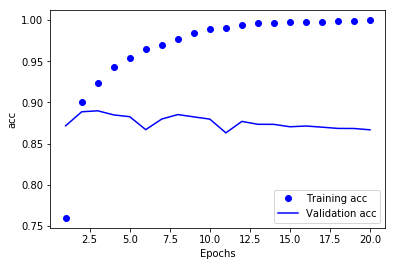

In [40]:
plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

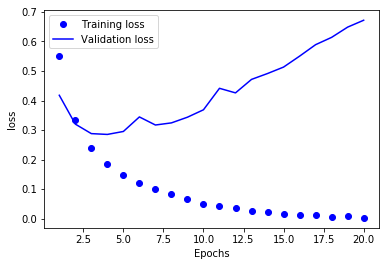

In [41]:
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape =(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4455 - acc: 0.8255
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2542 - acc: 0.9117
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1982 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step


In [44]:
results 

[0.2970326136493683, 0.88308]

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh', input_shape =(20000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers

model.compile(optimizer = optimizers.Adam(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

W0722 01:36:33.899121 140603164456832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 01:36:33.936474 140603164456832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 01:36:33.944514 140603164456832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 01:36:34.228039 140603164456832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 01:36:34.234374 140603164456832 deprecation_wrappe

Epoch 1/4
25000/25000 [==============================] - 7s 269us/step - loss: 0.3969 - acc: 0.8404
Epoch 2/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.2045 - acc: 0.9330
Epoch 3/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.1451 - acc: 0.9561
Epoch 4/4
25000/25000 [==============================] - 3s 129us/step


In [11]:
results # 은닉층 1개 시그모이드 유닛32 adam

[0.30221825128555296, 0.88272]

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh', input_shape =(20000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.4117 - acc: 0.8430
Epoch 2/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2237 - acc: 0.9260
Epoch 3/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.1625 - acc: 0.9444
Epoch 4/4
25000/25000 [==============================] - 3s 115us/step


In [25]:

results # 은닉층3개 시그모이드 유닛32 adam

[0.3166000823497772, 0.87836]

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(48, activation = 'tanh', input_shape =(20000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from keras import optimizers

model.compile(optimizer = optimizers.Adam(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 7, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
25000/25000 [==============================] - 3s 132us/step - loss: 0.3979 - acc: 0.8475
Epoch 2/7
25000/25000 [==============================] - 3s 120us/step - loss: 0.2043 - acc: 0.9298
Epoch 3/7
25000/25000 [==============================] - 3s 119us/step - loss: 0.1403 - acc: 0.9562
Epoch 4/7
25000/25000 [==============================] - 3s 127us/step - loss: 0.1031 - acc: 0.9716
Epoch 5/7
25000/25000 [==============================] - 3s 125us/step - loss: 0.0754 - acc: 0.9812
Epoch 6/7
25000/25000 [==============================] - 3s 130us/step - loss: 0.0563 - acc: 0.9880
Epoch 7/7
25000/25000 [==============================] - 3s 133us/step


In [21]:
results

[0.39516824283123014, 0.86964]

In [43]:
model.predict(x_test)

array([[0.1873708 ],
       [0.9993528 ],
       [0.85660267],
       ...,
       [0.15642571],
       [0.08603773],
       [0.63602406]], dtype=float32)

In [0]:
_results = model.evaluate(x_test,y_test)

ValueError: ignored

In [0]:
results